In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,GlobalAvgPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import callbacks,optimizers

In [2]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input

In [3]:
# Make new base directory
original_dataset_dir = 'F:/New chapter/PG/DSA/image_last/behred'
for i in os.listdir(original_dataset_dir):
    print(i)

fears
shame


In [4]:
for i in os.listdir(original_dataset_dir):
    print(i,len(os.listdir("F:/New chapter/PG/DSA/image_last/behred/"+i)))

fears 0
shame 0


In [5]:
os.mkdir("train")
os.mkdir("test")
for i in os.listdir(original_dataset_dir):
    os.mkdir("train/"+i)
    os.mkdir("test/"+i)
    for j in os.listdir("F:/New chapter/PG/DSA/image_last/behred/"+i)[:100]:
        os.rename("F:/New chapter/PG/DSA/image_last/behred/"+i+"/"+j,"train/"+i+"/"+j)
    for j in os.listdir("F:/New chapter/PG/DSA/image_last/behred/"+i)[:21]:
                os.rename("F:/New chapter/PG/DSA/image_last/behred/"+i+"/"+j,"test/"+i+"/"+j)

In [26]:
def img_data(dir_path,target_size,batch,class_lst,preporcssing,):
    if preporcssing:
        gen_object=ImageDataGenerator(preprocessing_function=preporcssing)
    else:
        gen_object=ImageDataGenerator()

    return(gen_object.flow_from_directory(dir_path,
                                            target_size=target_size,
                                            batch_size=batch,
                                            class_mode='sparse',
                                            classes=class_lst,
                                            shuffle=True))

In [27]:
train_data_gen=img_data("train",(224,224),500,os.listdir("train"),preprocess_input)
valid_data_gen=img_data("test",(224,224),500,os.listdir("test"),preprocess_input)

Found 208 images belonging to 2 classes.
Found 76 images belonging to 2 classes.


In [28]:
original_dataset_dir = 'F:/New chapter/PG/DSA/image_last'

In [29]:
train_dir = os.path.join(original_dataset_dir, 'train')
validation_dir = os.path.join(original_dataset_dir, 'test')


In [30]:
# Directory with our training fear pictures
train_fears_dir = os.path.join(train_dir, 'fears')

# Directory with our training shame pictures
train_shame_dir = os.path.join(train_dir, 'shame')

In [32]:
train_fears_fnames = os.listdir(train_fears_dir)
train_shame_fnames = os.listdir(train_shame_dir)

In [33]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

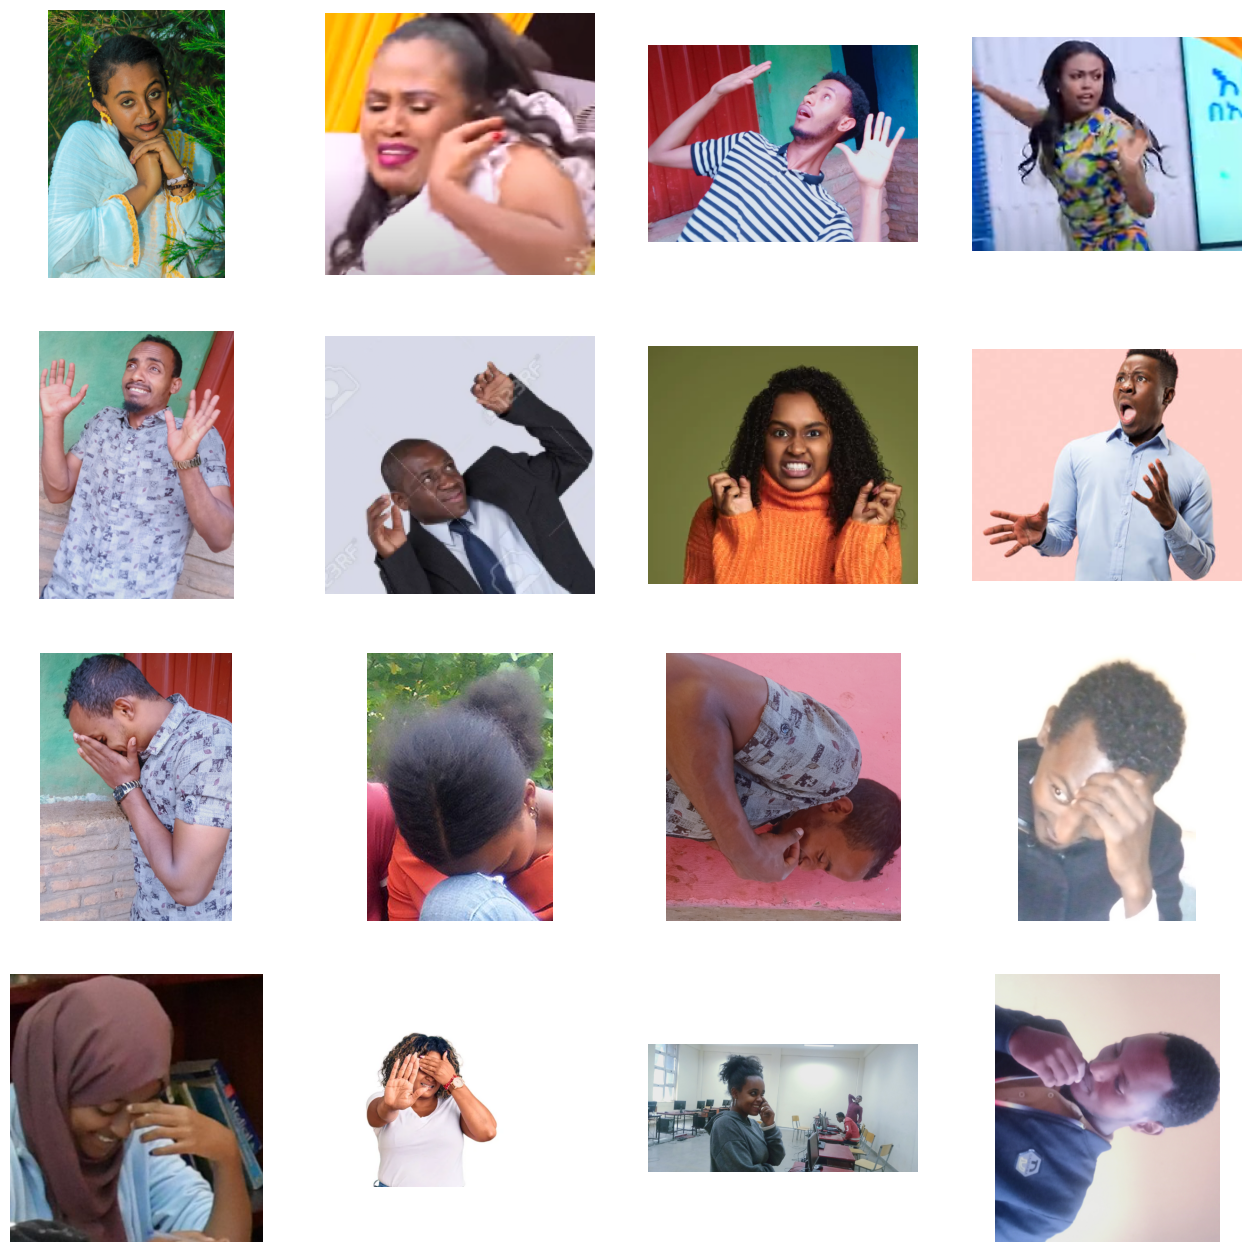

In [34]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_fear_pix = [os.path.join(train_fears_dir, fname) 
                for fname in train_fears_fnames[pic_index-8:pic_index]]
next_shame_pix = [os.path.join(train_shame_dir, fname) 
                for fname in train_shame_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_fear_pix+next_shame_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [35]:
base_model=tf.keras.applications.MobileNetV2(
    input_shape=(224,224,3),alpha=1.0,include_top=False,weights="imagenet",
    input_tensor=None,pooling=None,classes=1000,
    classifier_activation='softmax')

In [36]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [37]:
base_model.trainable=False

In [38]:
model=tf.keras.models.Sequential()
model.add(base_model)
model.add(GlobalAvgPool2D())
model.add(Dense(1024,activation="relu"))
model.add(Dense(1024,activation="softmax"))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
elst=callbacks.EarlyStopping(monitor='val_loss',patience=5,mode='min')
save_ok=callbacks.ModelCheckpoint('F:/New chapter/PG/DSA/image_last/behremodel2.hdf5',save_best_only=True,monitor='val_loss',mode='min')

In [40]:
history=model.fit(train_data_gen,batch_size=500,validation_data=valid_data_gen,callbacks=[elst,save_ok],epochs=10)

Epoch 1/10
1/1 [==============================] - 65s 65s/step - loss: 6.9579 - accuracy: 0.0000e+00 - val_loss: 1.5913 - val_accuracy: 0.6316
Epoch 2/10
1/1 [==============================] - 25s 25s/step - loss: 1.3864 - accuracy: 0.8125 - val_loss: 0.5402 - val_accuracy: 0.6974
Epoch 3/10
1/1 [==============================] - 17s 17s/step - loss: 0.3740 - accuracy: 0.8654 - val_loss: 0.5369 - val_accuracy: 0.6711
Epoch 4/10
1/1 [==============================] - 14s 14s/step - loss: 0.3691 - accuracy: 0.8221 - val_loss: 1.1687 - val_accuracy: 0.5263
Epoch 5/10
1/1 [==============================] - 13s 13s/step - loss: 0.7714 - accuracy: 0.5913 - val_loss: 0.4285 - val_accuracy: 0.7763
Epoch 6/10
1/1 [==============================] - 12s 12s/step - loss: 0.2032 - accuracy: 0.9279 - val_loss: 0.7822 - val_accuracy: 0.6711
Epoch 7/10
1/1 [==============================] - 12s 12s/step - loss: 0.5451 - accuracy: 0.7500 - val_loss: 0.4746 - val_accuracy: 0.7895
Epoch 8/10
1/1 [=======

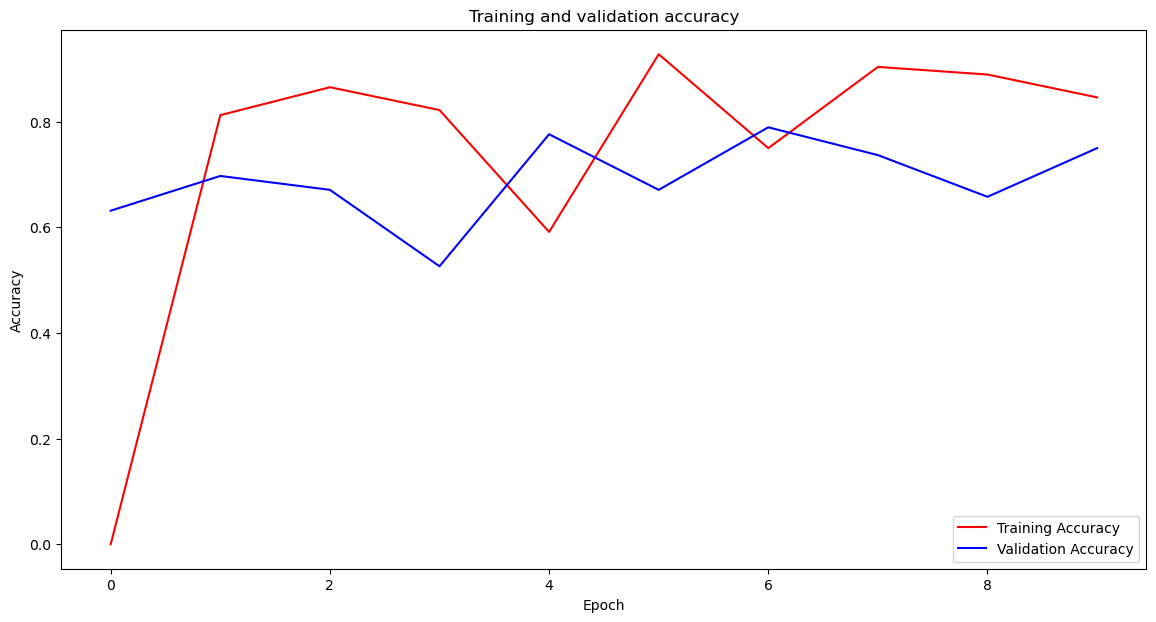

In [41]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()